패션MNIST 데이터 불러오기

In [1]:
# 합성곱 신경망은 2차원 이미지 그대로 사용하며 깊이(채널)이 있어야 하므로 채널 차원 추가하여 데이터 불러오기
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target),(test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1,28,28,1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

합성곱 신경망 만들기

In [2]:
# 합성곱의 층은 32개의 필터사용, 커널의 크기는(3,3)이고 렐루 활성화 함수와 세임 패딩 사용.
# 케라스 신경망 모델의 첫번쨰 층에서 입력의 차원 지정-input_shape 매개변수를 (28,28,1)값으로 지정.
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [3]:
# 풀링 층 추가-최대풀링
model.add(keras.layers.MaxPooling2D(2))

In [4]:
# 두번째 합성곱-풀링 층 추가-필터의 개수는 64개로 사용
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [5]:
# 3차원 특성맵을 일렬로펼치고 중간에 하나의 밀집 은닉층추가하기
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [6]:
# 모델 구조 출력
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [7]:
# !pip install pydot
# # !pip install pydotplus
# !pip install graphviz

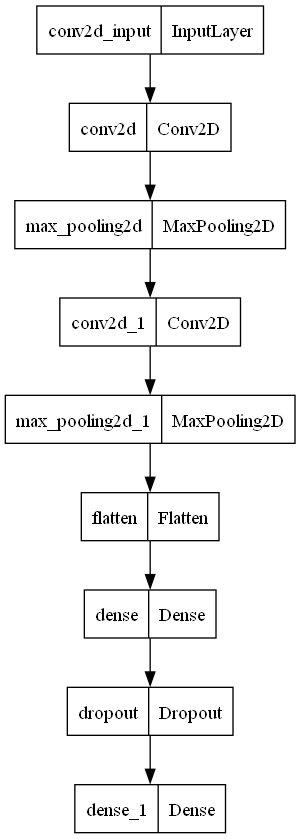

In [8]:
# 층의 구성을 그림으로 표현-plot_model()함수사용
keras.utils.plot_model(model)

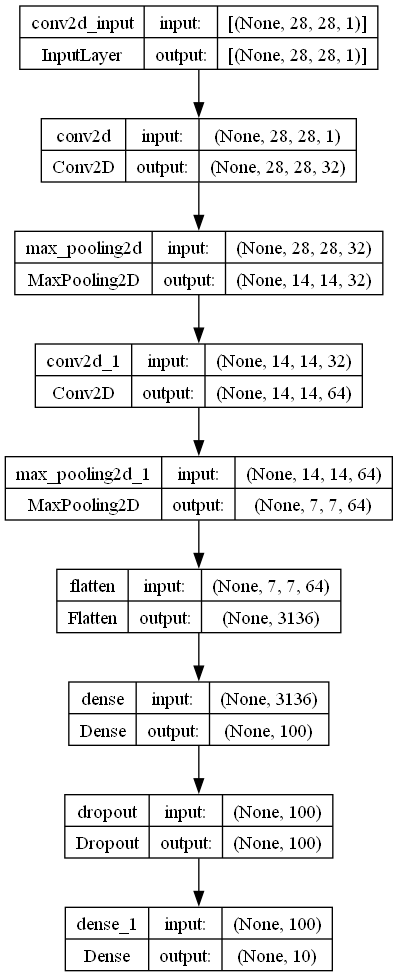

In [9]:
# show_shapes 매개변수를 True로 설정하여 그림에 입력과 출력의 크기 표시, to_file 매개변수에 파일이름을 지정하여 출력한 이미지 파일로저장
keras.utils.plot_model(model, show_shapes=True)

모델 컴파일과 훈련

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history=model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 10s 5ms/step - loss: 0.5255 - accuracy: 0.8098 - val_loss: 0.3182 - val_accuracy: 0.8821
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3444 - accuracy: 0.8765 - val_loss: 0.2704 - val_accuracy: 0.8991
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2952 - accuracy: 0.8932 - val_loss: 0.2650 - val_accuracy: 0.9025
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2617 - accuracy: 0.9046 - val_loss: 0.2492 - val_accuracy: 0.9038
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2394 - accuracy: 0.9113 - val_loss: 0.2310 - val_accuracy: 0.9136
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2180 - accuracy: 0.9199 - val_loss: 0.2393 - val_accuracy: 0.9107
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2039 - accuracy: 0.9238 - val_loss: 0.2239 - val_accuracy

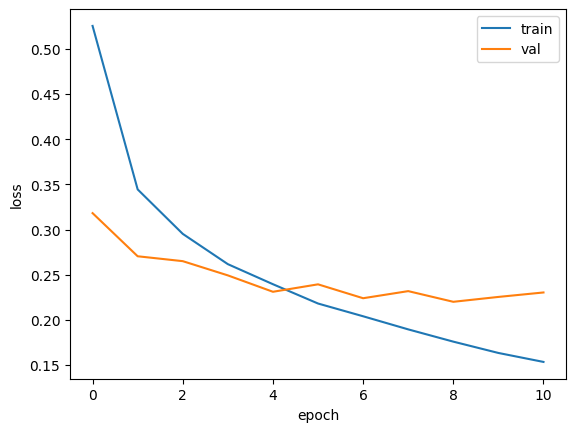

In [11]:
# 손실그래프로 조기종료가 잘 이루어졌는지 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [12]:
# 세트에 대한 성능 평가
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2199 - accuracy: 0.9198


[0.21994972229003906, 0.9198333621025085]

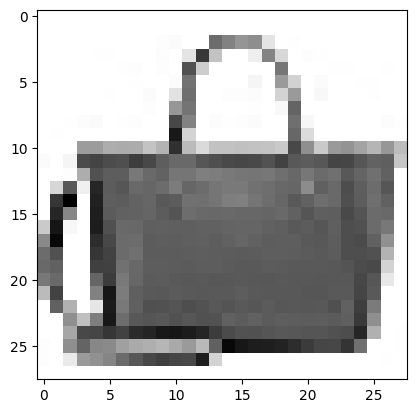

In [13]:
# 첫번쩨 샘플 이미지 확인
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()

In [16]:
# predict()메서드로 10개의 클래스에 대한 예측 확률 확인
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 261ms/step
[[8.82127337e-22 1.19484251e-27 1.74213867e-25 6.77808395e-26
  4.00683153e-22 1.22158885e-17 2.19099301e-23 7.43137467e-22
  1.00000000e+00 5.47076214e-21]]


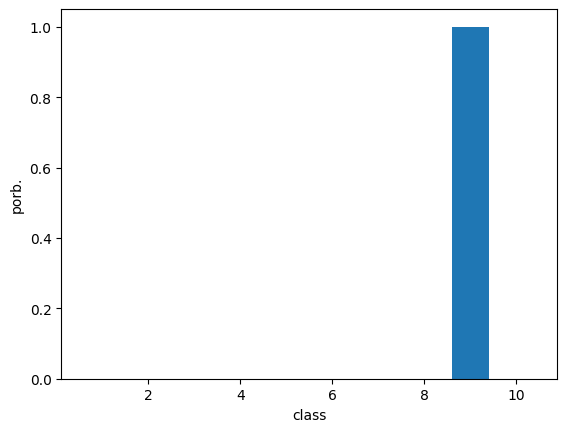

In [17]:
# 막대그래프로 그리기
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('porb.')
plt.show()

In [18]:
# 10개의 클래스를 리스트로 저장하기
classes=['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클부츠']

In [19]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [22]:
# 필셀값의 범위를 0~1사이로 바꾸고 이미지 크기를 (28,28)->(28,28,1)로 변경
# reshape(-1,28,28,1)은 reshape(batch_size, width, height, channel)을 의미. batch_size를 -1로 두면 자동으로 batch_size를 조정하겠다는 뜻이다. 
test_scaled = test_input.reshape(-1,28,28,1) /255.0

In [23]:
# evaluate()메서드로 테스트 세트에 대한 성능 측정
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2429 - accuracy: 0.9150


[0.24292856454849243, 0.9150000214576721]

In [ ]:
# 항상 테스트 세트는 모델을 출시하기 직전 딱 한번만 사용해야 함. 그렇지 않다면 모델을 실전에 투입했을 때 선능을 올바르게 예측하지 못한다.